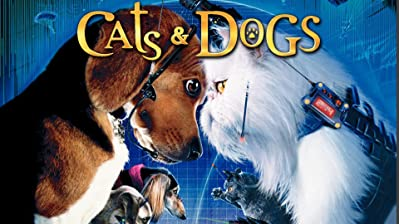

# imports

In [2]:
import cv2  
import numpy as np       
import os                  
from random import shuffle 
from tqdm import tqdm      
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn import ensemble
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
from numpy import nan
from numba import jit, cuda
scores=dict()
import random
path1= r'C:\Users\avida\Downloads\dogs-vs-cats-redux-kernels-edition\train\train/'
IMG_SIZE=32
LR = 1e-3
MODEL_NAME = 'dogsvscats-{}-{}.model'.format(LR, '2conv-basic')

# importing the data as image

In [3]:
#a function to import the images from the files in the computer and convert to df
filenames=os.listdir(path1)
category=[]
#dog is 1 cat is 0
for filename in filenames:
    if 'dog' in filename:
        category.append(1)
    else:
        category.append(0)

df={'filename':filenames,'label':category}
df=pd.DataFrame(df)

In [4]:
train_df, test_df = train_test_split(df, test_size=0.2,shuffle=True,random_state=42)
train_df = train_df.reset_index()
test_df = test_df.reset_index()
train_df=train_df.drop("index",axis=1)
test_df=test_df.drop("index",axis=1)

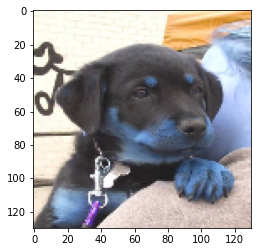

In [5]:
#sample image from the data
image = cv2.imread(path1+'/'+train_df['filename'][7])
image = cv2.resize(image, (130,130))
plt.imshow(image)

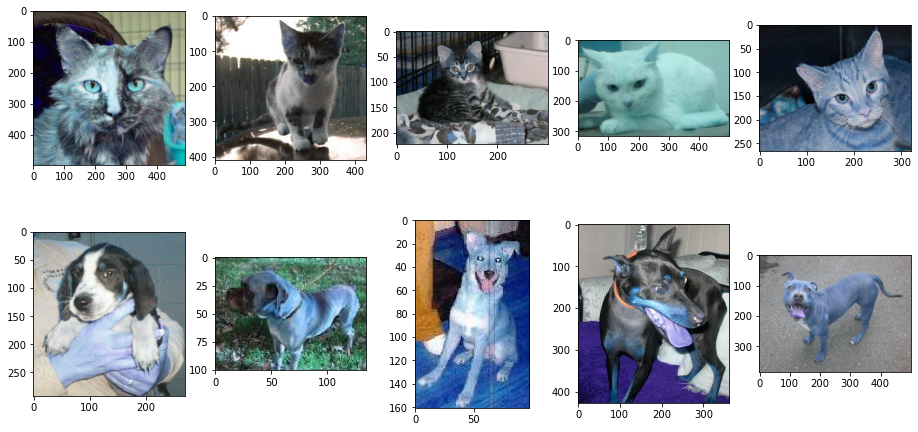

In [6]:
#some cats&dogs samples as an image from the data
fig = plt.figure(figsize=(45,45))

for i in range(10,15):
    img=cv2.imread(path1+'/'+r'cat.{}.jpg'.format(i))
    ax=fig.add_subplot(11,14,i)
    plt.imshow(img)
    img=cv2.imread(path1+'/'+r'dog.{}.jpg'.format(i))
    ax=fig.add_subplot(11,14,i+14)
    plt.imshow(img)

In [7]:
#function to convert the category data(cats&dogs)to numeral data 1,0
def label_img(img):
    word_label = img.split('.')[-3]
   
    if word_label == 'cat': return 1
    #                             
    elif word_label == 'dog': return 0

In [8]:
#importing the data from the files as csv and making df
labal_data =[]
training_data = []
for img in tqdm(os.listdir(path1)):
        label = label_img(img)
        path = os.path.join(path1,img)
        img = cv2.imread(path, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE),interpolation=cv2.INTER_AREA)
        training_data.append(pd.Series(img.flatten()))
        labal_data.append(label)

100%|██████████| 25000/25000 [01:50<00:00, 226.18it/s]


In [9]:
x_train = pd.DataFrame(training_data)
y_train = pd.DataFrame(labal_data, columns = ['labels'])

In [10]:
train_data = pd.concat([x_train, y_train], axis=1)
train_data

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,labels
0,93,170,209,103,181,224,114,192,235,119,...,1,4,3,0,3,3,0,3,2,1
1,45,43,39,45,45,40,52,53,44,52,...,48,57,73,47,52,69,43,48,63,1
2,57,50,41,66,59,50,68,61,52,70,...,116,140,147,30,160,168,6,185,187,1
3,218,223,222,227,229,228,227,228,228,227,...,205,208,207,213,214,212,210,214,216,1
4,62,97,124,45,83,109,82,124,149,111,...,51,76,90,65,90,104,57,83,95,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,108,145,149,112,149,153,115,152,156,117,...,131,167,177,133,168,178,134,169,179,0
24996,61,88,115,62,90,111,56,86,110,50,...,55,82,109,52,80,103,52,81,102,0
24997,38,41,44,47,50,51,44,48,49,41,...,79,128,154,93,137,169,94,132,166,0
24998,244,243,252,176,192,230,97,123,140,70,...,99,111,102,104,111,113,113,116,126,0


In [11]:
#cheking if there null in the data
train_data.isnull().any().sum()

0

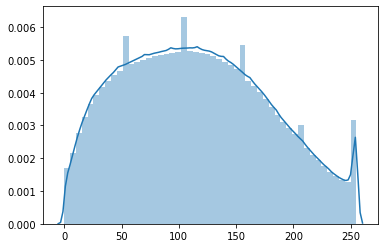

In [12]:
#the distribution of all the data after cleaning
sns.distplot(train_data);

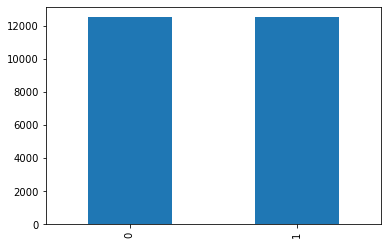

In [13]:
#checking that the data is balance
train_data['labels'].value_counts().sort_index().plot.bar()

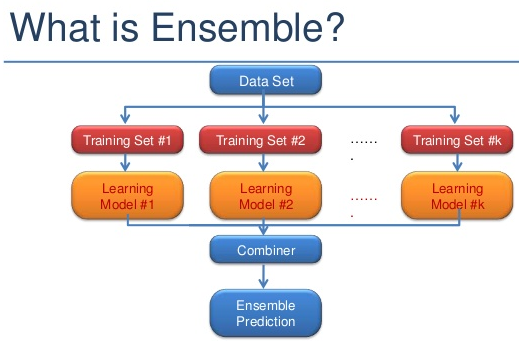

# train\test split 

In [14]:
#setting the vectors x,y
y_train= train_data["labels"]
x_train= train_data.drop(labels = ["labels"], axis = 1)

The above figure shows a colorbar going from 0 to 255. The highest value is 255. It's always a best approach to rescale/normalize the data before feeding it to ML model.
Normalizing the data, speeds up learning and leads to faster convergence of the learning algorithm.

# scaling the data as the values are centered around the mean with a unit standard deviation.

Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

z = (x - u) / s

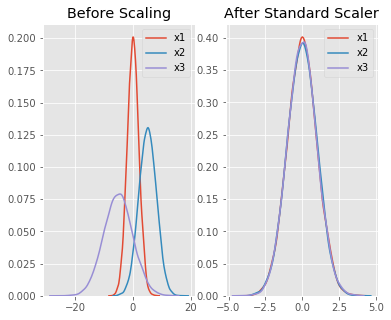

Although normalization via min-max scaling is a commonly used technique that is useful when we need values in a bounded interval,
standardization can be more practical for many machine learning algorithms. The reason is that many linear models,
such as the logistic regression and SVM,
[...] initialize the weights to 0 or small random values close to 0. Using standardization,
we center the feature columns at mean 0 with standard deviation 1 so that the feature columns take the form of a normal distribution, which makes it easier to learn the weights. Furthermore, standardization maintains useful information about outliers and makes the algorithm less sensitive to them in contrast to min-max scaling,
which scales the data to a limited range of values

In [16]:
#define the scale function
scale = StandardScaler()
x_train = pd.DataFrame(scale.fit_transform(x_train.values), columns=x_train.columns, index=x_train.index)

# define the parameters to  training the model 

train\test split to train the data without the data test to get a better prediction that is true

In [17]:
x_train, x_test, y_train, y_test = train_test_split( x_train, y_train, test_size = 0.1, random_state=21)

In [18]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
7356,2.132955,2.059854,1.981114,2.142688,2.067342,1.984089,2.126943,2.053156,1.971304,2.116550,...,1.891978,2.126704,2.060800,1.907887,2.137642,2.070863,1.922115,2.136343,2.072150,1.929758
14296,-0.805026,-1.019212,-1.121378,-0.849317,-1.071079,-1.174273,-0.514015,-0.686331,-0.825796,0.258739,...,1.017220,0.636908,1.228730,1.279863,0.518127,1.119441,1.191486,0.515648,1.098755,1.144769
23818,-0.761820,-0.886621,-0.901862,-1.168851,-1.279316,-1.292343,-1.283086,-1.415868,-1.476972,-0.466969,...,0.740980,0.530494,0.632152,0.789697,0.593805,0.682724,0.795730,0.170500,0.202614,0.389973
14089,0.678367,0.719208,0.751825,0.748356,0.817923,0.788634,0.806464,0.862075,0.861344,0.824790,...,0.219194,-1.156928,-0.388312,0.131038,-1.177066,-0.393474,0.065101,-1.315138,-0.461767,0.027670
23622,-0.689811,-0.621438,-0.287218,-0.616928,-0.520740,-0.229716,-0.630101,-0.567223,-0.248616,-0.786280,...,0.004341,-0.700868,-0.545306,-0.251904,-0.722996,-0.549445,-0.224106,-0.399745,-0.214555,0.042766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16432,0.577554,-0.297326,0.327427,0.254530,-0.565362,-0.023094,0.153480,-0.671442,-0.145020,-0.002516,...,-1.530323,-0.609656,-1.016289,-1.446682,-0.117570,-0.674221,-1.183055,0.245532,-0.307260,-0.923373
8964,0.750376,0.468758,0.224986,0.719307,0.431198,0.183527,0.690378,0.400531,0.180568,0.549022,...,0.173154,-0.244808,-0.152820,0.146355,-0.284062,-0.175115,0.110766,-0.279694,-0.199105,0.072958
5944,-0.776222,-0.606706,-0.609174,-0.907414,-0.803347,-0.805306,-0.528526,-0.433226,-0.485408,-0.278285,...,0.618207,1.807462,1.558418,0.912239,1.971149,1.836907,1.206708,1.971273,1.824939,1.129673
5327,-0.156942,-0.297326,-0.228680,-0.181199,-0.327378,-0.259234,-0.049671,-0.195010,-0.130221,-0.133144,...,-0.578831,-0.503242,-0.670902,-0.619528,-0.480826,-0.674221,-0.619862,-0.414752,-0.585373,-0.530879


# pca

The principal components of a collection of points in a real coordinate space are a sequence of p unit vectors,
where the i-th vector is the direction of a line that best fits the data while being orthogonal to the first i-1 vectors.
Here
,a best-fitting line is defined as one that minimizes the average squared distance from the points to the line.
These directions constitute an orthonormal basis in which different individual dimensions of the data are linearly uncorrelated.
Principal component analysis (PCA) is the process of computing the principal components and using them to perform a change of basis on the data,
sometimes using only the first few principal components and ignoring the rest.

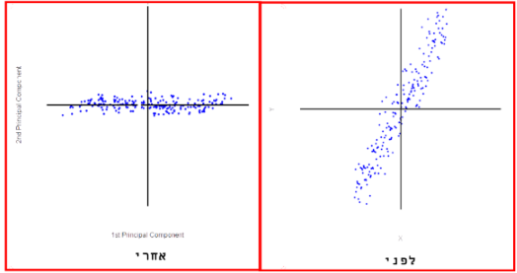

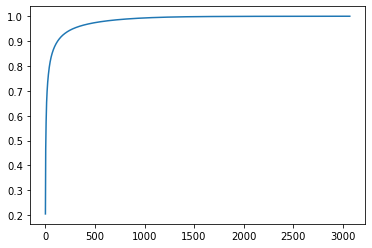

In [19]:
#checking how much components we can remove from the data without making a big reduce to the accuracy
pca = PCA()
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)

In [20]:
#we saw that the elbow is very long so we can remove 2947 features and still get a high accuracy,lets try it.
pca = PCA(n_components=0.9)
train_pca = pca.fit_transform(x_train)
X_test_pca = pca.transform(x_test)
print("numer of attributes after PCA: ",pca.n_components_,"\nnumber of attributes before PCA: ",len(list(x_train.columns)))

numer of attributes after PCA:  125 
number of attributes before PCA:  3072


125


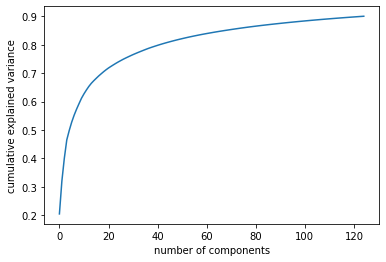

In [21]:
#as we can see in the plot another remove will damage the data
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
print(pca.n_components_)

In [22]:
X_train_PCA1 = pd.DataFrame(train_pca)
X_test_PCA1 = pd.DataFrame(X_test_pca)

# DummyClassifier

1.Most Frequent: The classifier always predicts the most frequent class label in the training data.

2.Stratified: It generates predictions by respecting the class distribution of the training data. It is different from the “most frequent” strategy as it instead associates a probability with each data point of being the most frequent class label.

3.Uniform: It generates predictions uniformly at random.

[0.4908, 0.4812, 0.5132]


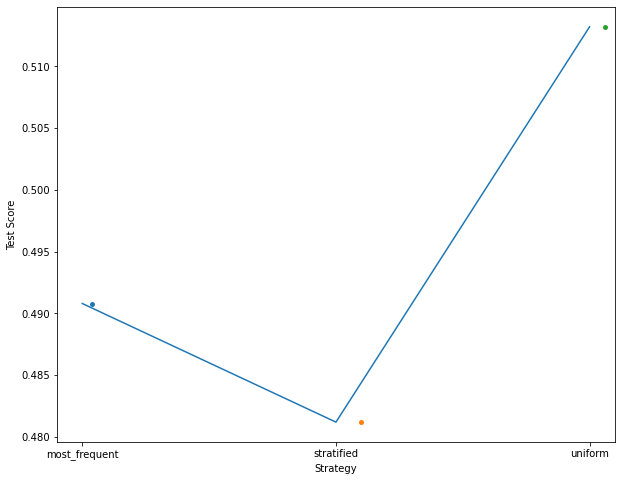

In [23]:
strategies = ['most_frequent','stratified', 'uniform'] 
test_scores = [] 
for s in strategies: 
    if s == 'most_frequent':
        dclf = DummyClassifier(strategy = s, random_state = 0) 
    else:
        dclf = DummyClassifier(strategy = s, random_state = 0) 
    dclf.fit(X_train_PCA1, y_train) 
    score = dclf.score(x_test, y_test) 
    test_scores.append(score) 
print(test_scores)
plt.figure(figsize=(10,8))
ax = sns.stripplot(strategies,test_scores)
sns.lineplot(x=strategies,y=test_scores,ax=ax)
ax.set(xlabel ='Strategy', ylabel ='Test Score') 
plt.show() 

In [24]:
#a function to produce the confusion matrix and classification report togther
def stats(model):
    y_pred=model.predict(X_test_PCA1)
    plt.figure(1, figsize= (10,10))
    c_m=confusion_matrix(y_test, y_pred, labels=None, sample_weight=None)
    print("Confusion Matrix ")
    sns.heatmap(c_m.T, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()
    plt.close()
    print(classification_report(y_test, y_pred,digits=4))

# Knn

the k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems.

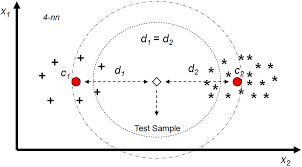

In [25]:
# Build knn model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_PCA1, y_train)
Y_pred = knn.predict(X_test_PCA1)
print(metrics.accuracy_score(y_test,Y_pred))

0.6004


In [27]:
#grid search to get the best paramters to this model
knn_param_grid =     {
         'n_neighbors': list(range(3,100,10)),
         'weights':['uniform','distance'],
         'metric': ['euclidean','manhattan','minkowski'],
        }

    knn_grid_search = RandomizedSearchCV(
        KNeighborsClassifier(n_jobs=-1),
        knn_param_grid,
        cv=3,
        scoring='accuracy',
        return_train_score=True,
        random_state=0
    )
    knn_grid_search.fit(X_train_PCA1, y_train)
    
knn_grid_search.best_estimator_

KNeighborsClassifier(metric='euclidean', n_jobs=-1, n_neighbors=53,
                     weights='distance')

In [28]:
knn_grid_search.best_score_

0.6106222222222222

Confusion Matrix 


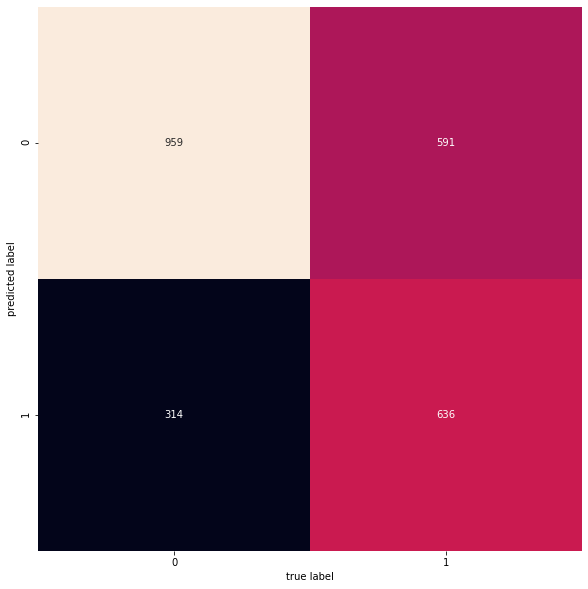

              precision    recall  f1-score   support

           0     0.6187    0.7533    0.6794      1273
           1     0.6695    0.5183    0.5843      1227

    accuracy                         0.6380      2500
   macro avg     0.6441    0.6358    0.6319      2500
weighted avg     0.6436    0.6380    0.6327      2500



In [29]:
#checking the model with the new parameters
knn = KNeighborsClassifier(metric='euclidean', n_jobs=-1, n_neighbors=53,
                     weights='distance')
knn.fit(X_train_PCA1, y_train)
Y_pred = knn.predict(X_test_PCA1)

scores["knn"]=accuracy_score(y_test,Y_pred)
stats(knn)

# gaussian naive bayes

the Gaussian Processes Classifier is a classification machine learning algorithm.
Gaussian Processes are a generalization of the Gaussian probability distribution and can be used as the basis for sophisticated non-parametric machine learning algorithms for classification and regression

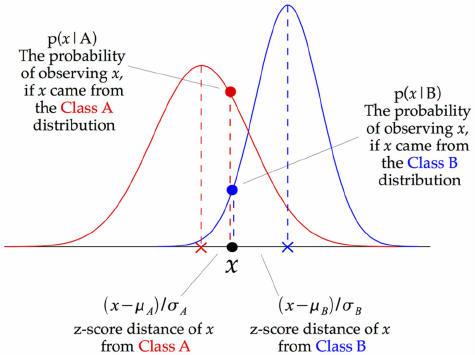

Confusion Matrix 


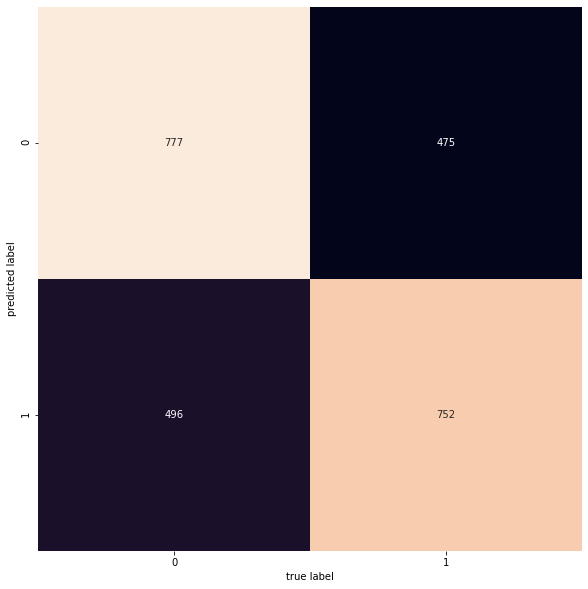

              precision    recall  f1-score   support

           0     0.6206    0.6104    0.6154      1273
           1     0.6026    0.6129    0.6077      1227

    accuracy                         0.6116      2500
   macro avg     0.6116    0.6116    0.6116      2500
weighted avg     0.6118    0.6116    0.6116      2500



In [30]:
# Build gaussian naive bayes model
gnb = GaussianNB()
gnb.fit(X_train_PCA1,y_train)
y_pred = gnb.predict(X_test_PCA1)
scores["gnb"]=accuracy_score(y_test, y_pred)
stats(gnb)

# LogisticRegression

Logistic regression is a linear algorithm (with a non-linear transform on output).
It does assume a linear relationship between the input variables with the output. Data transforms of your input variables that better expose this linear relationship can result in a more accurate model

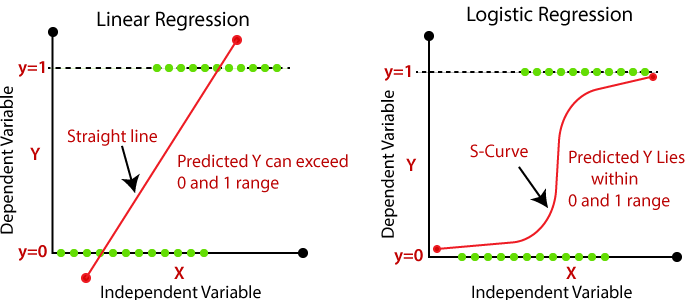

Confusion Matrix 


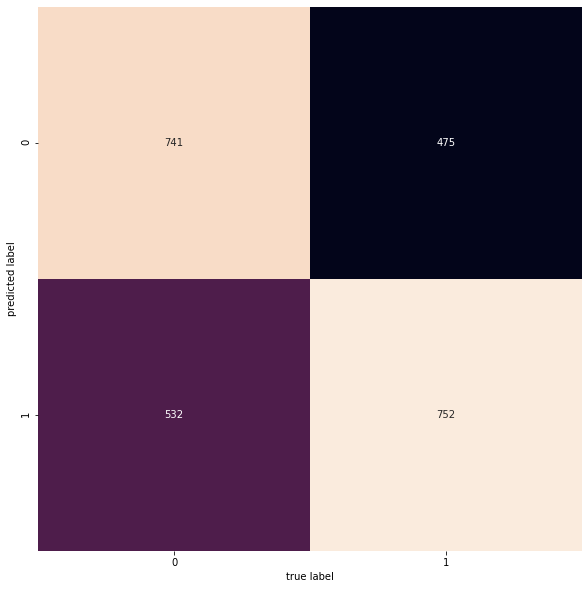

              precision    recall  f1-score   support

           0     0.6094    0.5821    0.5954      1273
           1     0.5857    0.6129    0.5990      1227

    accuracy                         0.5972      2500
   macro avg     0.5975    0.5975    0.5972      2500
weighted avg     0.5977    0.5972    0.5972      2500



In [31]:
# Build LogisticRegression model
clf_log = LogisticRegression(n_jobs = -1)
clf_log.fit(X_train_PCA1,y_train)
y_pred_logistic= clf_log.predict(X_test_PCA1)
scores["clf_log"]=accuracy_score(y_test, y_pred_logistic)
stats(clf_log)

# Random forest

It utilizes ensemble learning, which is a technique that combines many classifiers to provide solutions to complex problems.
A random forest algorithm consists of many decision trees

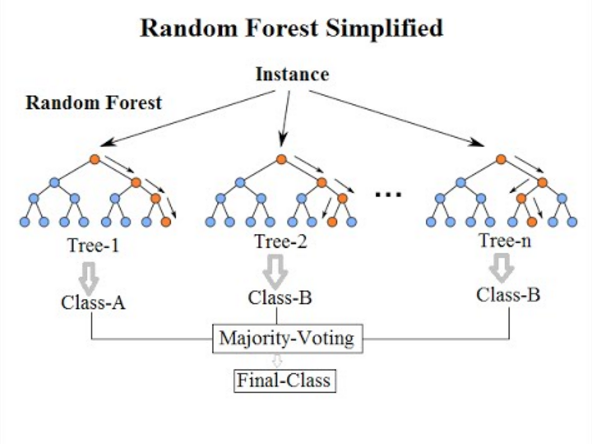

In [32]:
# Build Random Forest model
clf=RandomForestClassifier(n_estimators=250)
clf.fit(X_train_PCA1, y_train)
y_pred=clf.predict(X_test_pca)
print(metrics.accuracy_score(y_test, y_pred))

0.6448


In [34]:
#grid search to get the best paramters to this model
forest_params = {
     'n_estimators': [100,200,400],
     'max_depth':[None,30,100],
     'max_features': ['auto','sqrt','log2'],
     'random_state':[0]
}

forest_grid_search = RandomizedSearchCV(
    RandomForestClassifier(n_jobs=-1),
    forest_params,
    cv=3,
    scoring='accuracy',
    return_train_score=True,
    random_state=0
)

forest_grid_search.fit(X_train_PCA1, y_train)
forest_grid_search.best_estimator_

RandomForestClassifier(max_depth=30, max_features='sqrt', n_estimators=400,
                       n_jobs=-1, random_state=0)

In [35]:
forest_grid_search.best_score_

0.6468444444444444

Confusion Matrix 


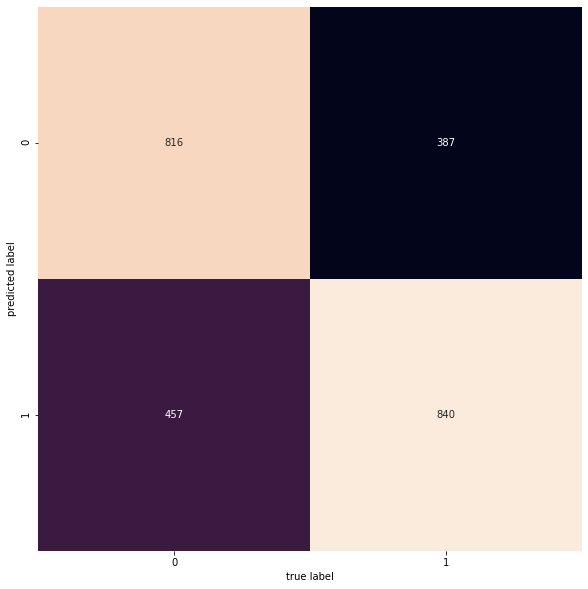

              precision    recall  f1-score   support

           0     0.6783    0.6410    0.6591      1273
           1     0.6476    0.6846    0.6656      1227

    accuracy                         0.6624      2500
   macro avg     0.6630    0.6628    0.6624      2500
weighted avg     0.6633    0.6624    0.6623      2500



In [36]:
# Build random forest model with new parameters
random_forest = RandomForestClassifier(max_depth=30, max_features='sqrt', n_estimators=400,
                       n_jobs=-1, random_state=0)
random_forest.fit(X_train_PCA1, y_train)
y_pred_forest = random_forest.predict(X_test_pca)

scores["random_forest"]=accuracy_score(y_test, y_pred_forest)
stats(random_forest)

# xgBoost

xgBoost is an algorhitm that uses a more regularized model formalization to control over-fitting, which gives it better performance to get a better accucracy.

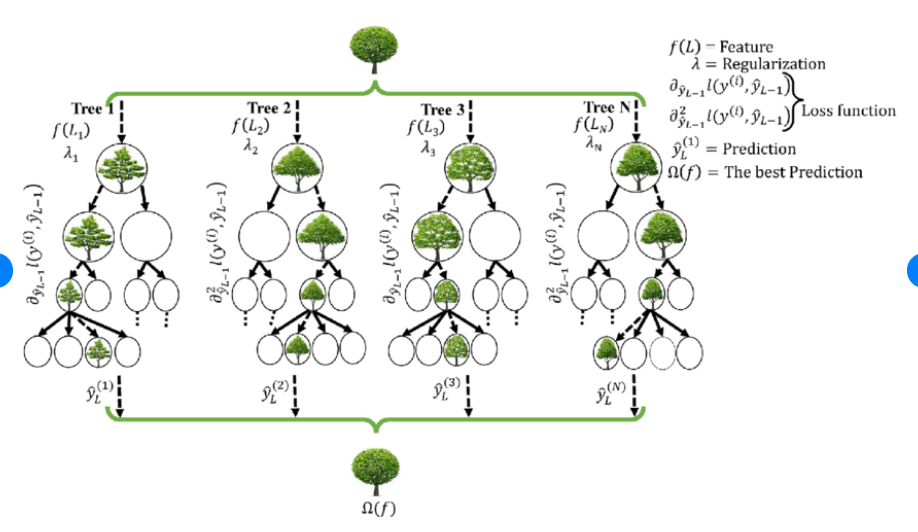

In [37]:
# set the xgboost model.
xgb_reg = xgboost.XGBClassifier(eval_metric='mlogloss',use_label_encoder=False)
xgb_reg.fit(X_train_PCA1, y_train)
y_pred_xgb_reg = xgb_reg.predict(X_test_PCA1)
xgb_reg_accuracy = metrics.accuracy_score(y_test, y_pred_xgb_reg)

print("Test Accuracy score: {}".format(xgb_reg_accuracy))

Test Accuracy score: 0.6424


In [47]:
#grid search to get the best paramters to this model
xgb_params = {
        'max_depth': [3,6,10],
        'learning_rate': [0.01, 0.05, 0.1],
        'n_estimators': [100, 500, 1000],
        'colsample_bytree': [0.3, 0.7],
    }

xgb_clf = XGBClassifier(
        gamma = 0,
        colsample_bytree = 0.8)

XGBGridsearch = RandomizedSearchCV(xgb_clf, xgb_params,scoring='accuracy',cv=3, random_state=0,n_jobs=-1)
XGBGridsearch.fit(X_train_PCA1, y_train)

XGBGridsearch.best_estimator_

[15:23:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

[15:26:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion Matrix 


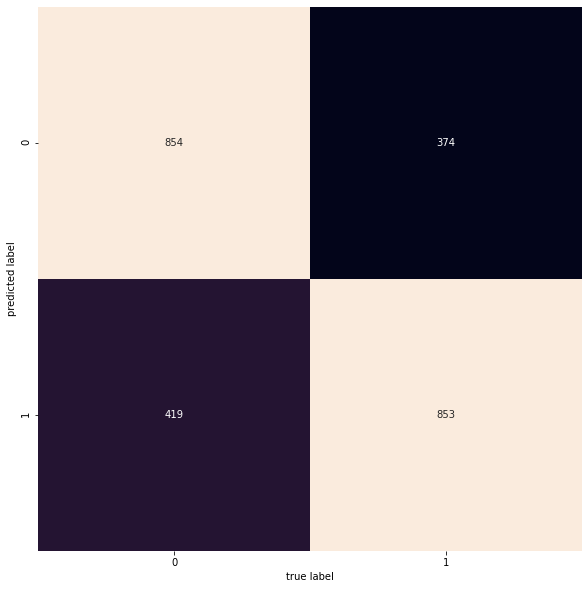

              precision    recall  f1-score   support

           0     0.6954    0.6709    0.6829      1273
           1     0.6706    0.6952    0.6827      1227

    accuracy                         0.6828      2500
   macro avg     0.6830    0.6830    0.6828      2500
weighted avg     0.6832    0.6828    0.6828      2500



In [49]:
# Build xgboost model with the new paranteres
xgb_reg = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=2000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
xgb_reg.fit(X_train_PCA1, y_train)
y_pred = xgb_reg.predict(X_test_PCA1)

scores["XGBoost"]=accuracy_score(y_test,y_pred)
stats(xgb_reg)

# adaBoost

adaBoost algorithm, short for Adaptive Boosting, is a Boosting technique used as an Ensemble Method in Machine Learning. It is called Adaptive Boosting as the weights are re-assigned to each instance, with higher weights assigned to incorrectly classified instances.

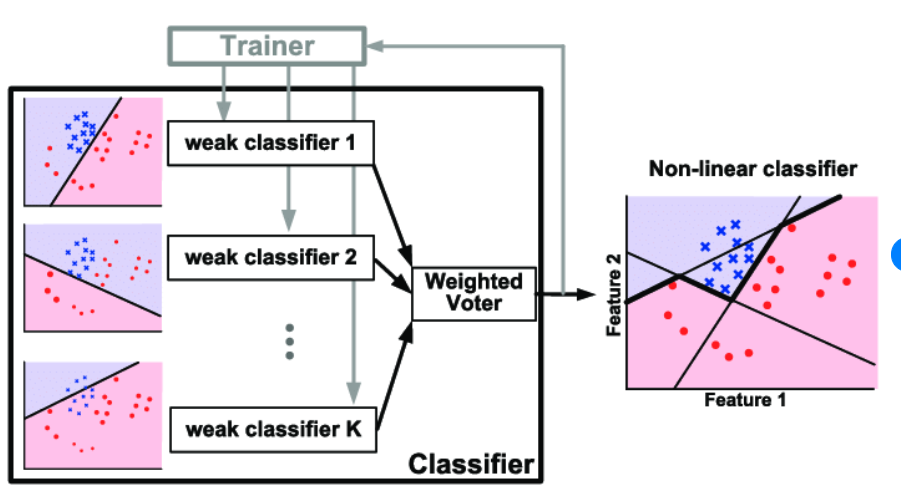

Confusion Matrix 


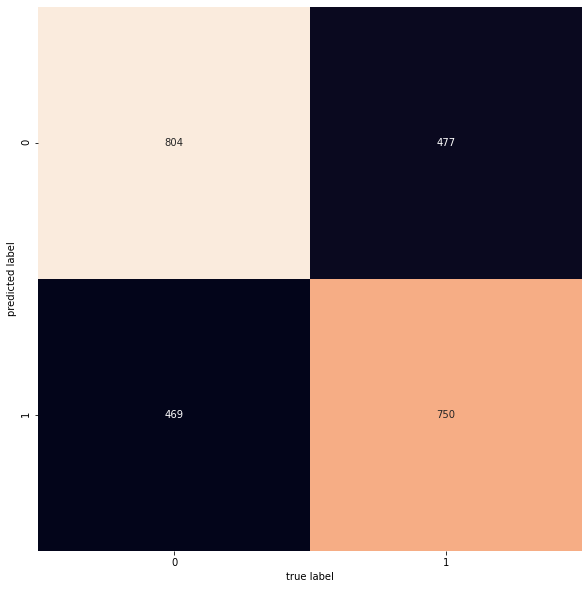

              precision    recall  f1-score   support

           0     0.6276    0.6316    0.6296      1273
           1     0.6153    0.6112    0.6132      1227

    accuracy                         0.6216      2500
   macro avg     0.6214    0.6214    0.6214      2500
weighted avg     0.6216    0.6216    0.6216      2500



In [51]:
# set the adaboost model
classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200,algorithm="SAMME.R",learning_rate=0.35
)
model=classifier.fit(X_train_PCA1,y_train)

y_pred_ada = model.predict(X_test_PCA1)
ada_accuracy = metrics.accuracy_score(y_test, y_pred_ada)

scores["XGBoost"]=accuracy_score(y_test,y_pred_ada)
stats(model)

# Voting

A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output.
It simply aggregates the findings of each classifier passed into Voting Classifier and predicts the output class based on the highest majority of voting.

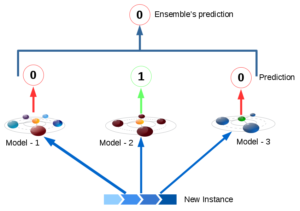

Confusion Matrix 


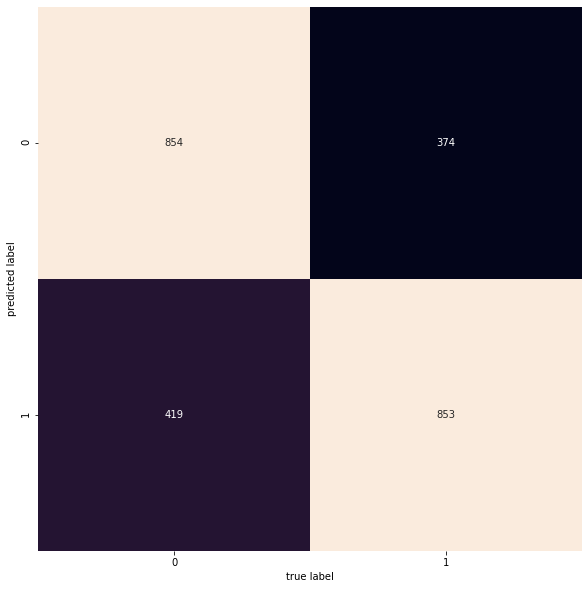

              precision    recall  f1-score   support

           0     0.6954    0.6709    0.6829      1273
           1     0.6706    0.6952    0.6827      1227

    accuracy                         0.6828      2500
   macro avg     0.6830    0.6830    0.6828      2500
weighted avg     0.6832    0.6828    0.6828      2500



In [52]:
# Build "hard" voting model
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(max_depth=30, max_features='sqrt', n_estimators=400,
                       n_jobs=-1, random_state=0)
xgb_clf = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=2000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
knn = KNeighborsClassifier(metric='euclidean', n_jobs=-1, n_neighbors=53,
                     weights='distance')

voting_clf = VotingClassifier(
    estimators=[('rf', rnd_clf),('xgb', xgb_clf),('knn_bag', BaggingClassifier(knn))],voting='hard',weights=[1,4,1],n_jobs=-1)
voting_clf.fit(X_train_PCA1,y_train)
y_pred_clf=voting_clf.predict(X_test_PCA1)
scores["voting_clf"]=accuracy_score(y_test, y_pred_clf)
stats(voting_clf)

# Stacking

stacked Generalization, or stacking for short, is an ensemble machine learning algorithm. 
Stacking involves using a machine learning model to learn how to best combine the predictions from contributing ensemble members

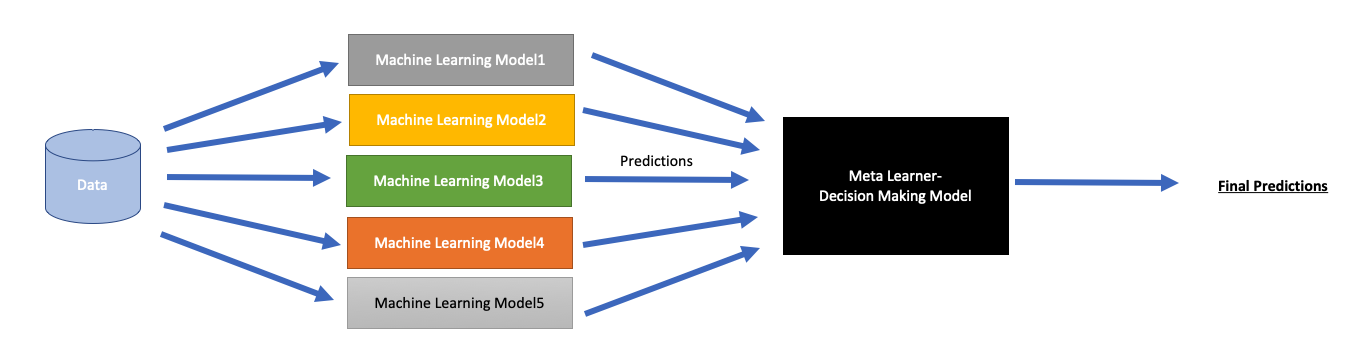

[15:43:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion Matrix 


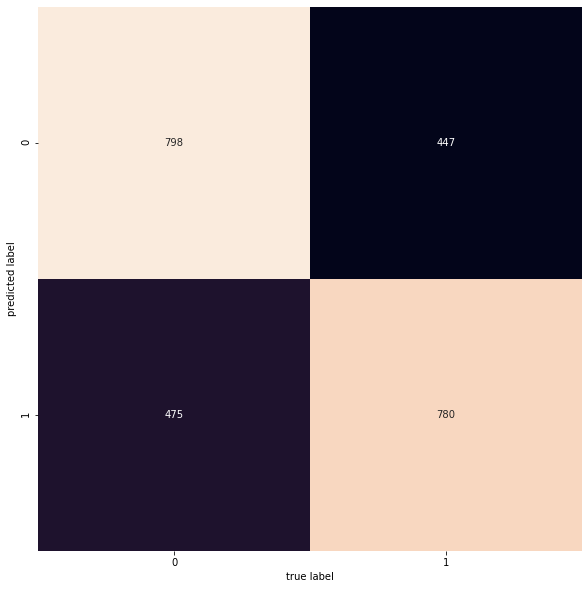

              precision    recall  f1-score   support

           0     0.6410    0.6269    0.6338      1273
           1     0.6215    0.6357    0.6285      1227

    accuracy                         0.6312      2500
   macro avg     0.6312    0.6313    0.6312      2500
weighted avg     0.6314    0.6312    0.6312      2500



In [53]:
# Build stack model
stack_model = StackingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf),('knn_bag', BaggingClassifier(knn))],final_estimator=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=2000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None))
stack_model.fit(X_train_PCA1,y_train)
y_test_pred = stack_model.predict(X_test_PCA1)


scores["stack_model"]=accuracy_score(y_test, y_test_pred)
stats(stack_model)

Confusion Matrix 


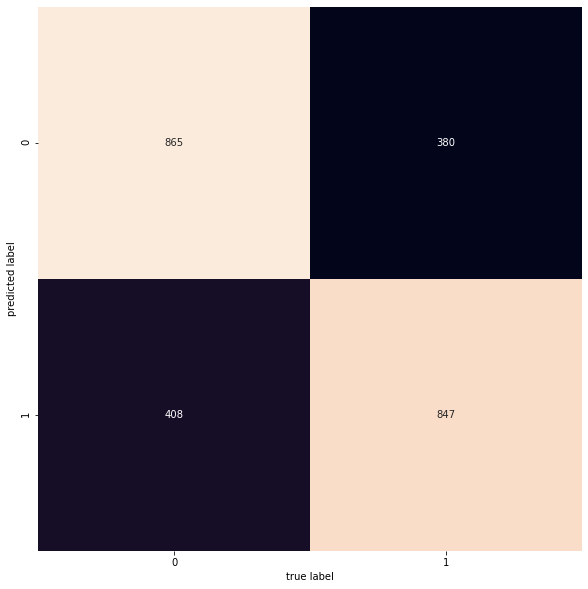

              precision    recall  f1-score   support

           0     0.6948    0.6795    0.6871      1273
           1     0.6749    0.6903    0.6825      1227

    accuracy                         0.6848      2500
   macro avg     0.6848    0.6849    0.6848      2500
weighted avg     0.6850    0.6848    0.6848      2500



In [54]:
# Build "soft" voting model
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(max_depth=30, max_features='sqrt', n_estimators=400,
                       n_jobs=-1, random_state=0)
xgb_clf = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=2000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
knn = KNeighborsClassifier(metric='euclidean', n_jobs=-1, n_neighbors=53,
                     weights='distance')

voting_clf = VotingClassifier(
    estimators=[('rf', rnd_clf),('xgb', xgb_clf),('knn_bag', BaggingClassifier(knn))],voting='soft',weights=[1,4,1],n_jobs=-1)
voting_clf.fit(X_train_PCA1,y_train)
y_pred_clf=voting_clf.predict(X_test_PCA1)
scores["voting_clf"]=accuracy_score(y_test, y_pred_clf)
stats(voting_clf)

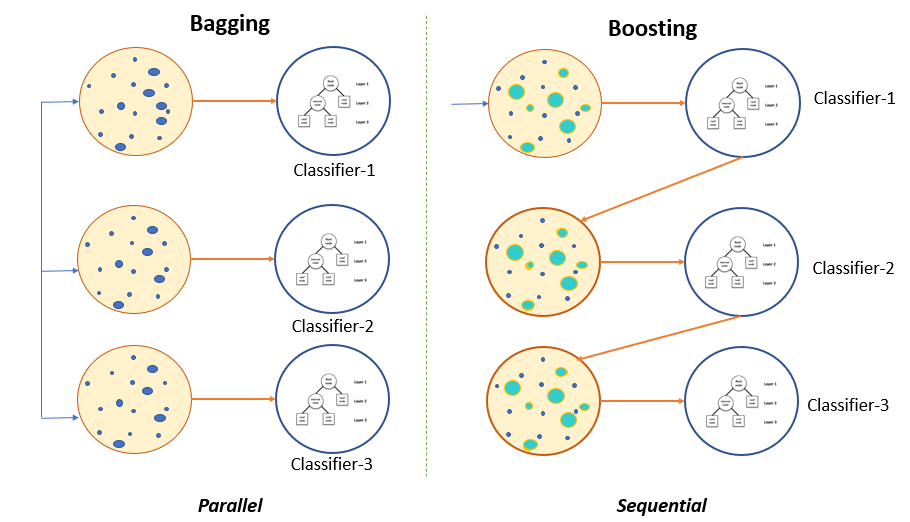

# conclusion

# after all the hard work, the best model is "voting(soft) model" with '68.48'% accuracy,and just 125 features(we start with 3072)!!!